In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Feature Engineering
# Merge transactions with products to get category
transactions_products = pd.merge(transactions, products, on="ProductID", how="left")

# Aggregate transaction data to create customer profiles
customer_features = transactions_products.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],
    "Quantity": "sum",
    "Category": lambda x: x.mode()[0] if not x.mode().empty else "Unknown"
}).reset_index()

customer_features.columns = ["CustomerID", "TotalSpend", "AverageSpend", "TotalQuantity", "TopCategory"]

# Merge with customer data
customer_profiles = pd.merge(customers, customer_features, on="CustomerID", how="left")

# Preprocessing
# Handle missing values
customer_profiles.fillna(0, inplace=True)

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop="first")
region_encoded = encoder.fit_transform(customer_profiles[["Region"]])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(["Region"]))

customer_profiles = pd.concat([customer_profiles, region_encoded_df], axis=1).drop(columns=["Region", "CustomerName", "SignupDate", "TopCategory"])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ["TotalSpend", "AverageSpend", "TotalQuantity"]
customer_profiles[numerical_columns] = scaler.fit_transform(customer_profiles[numerical_columns])

# Clustering
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(customer_profiles)

# Evaluate Clustering
db_index = davies_bouldin_score(customer_profiles[numerical_columns], customer_profiles["Cluster"])
print("Davies-Bouldin Index:", db_index)

# Visualization
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_profiles[numerical_columns])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_profiles["Cluster"], palette="Set2", s=100)
plt.title("Customer Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Products.csv'

Downloading...
From: https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 17.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 3.36MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 14.2MB/s]


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

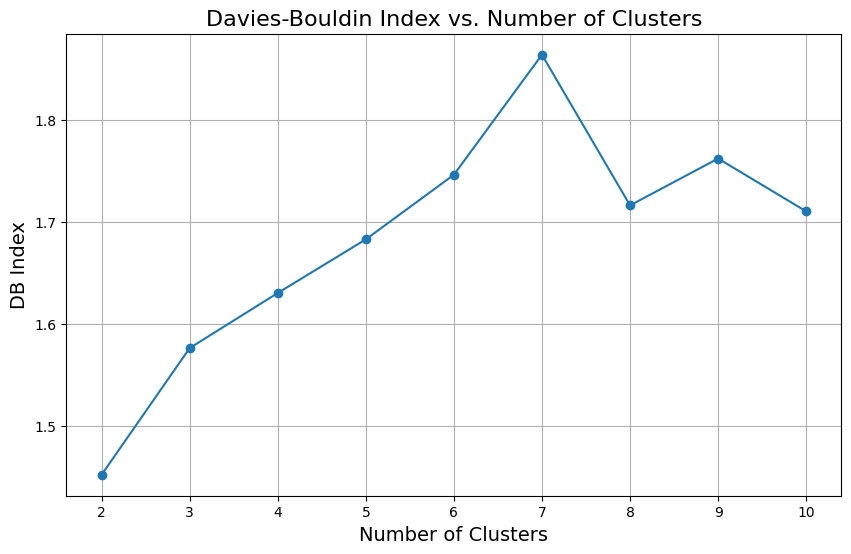

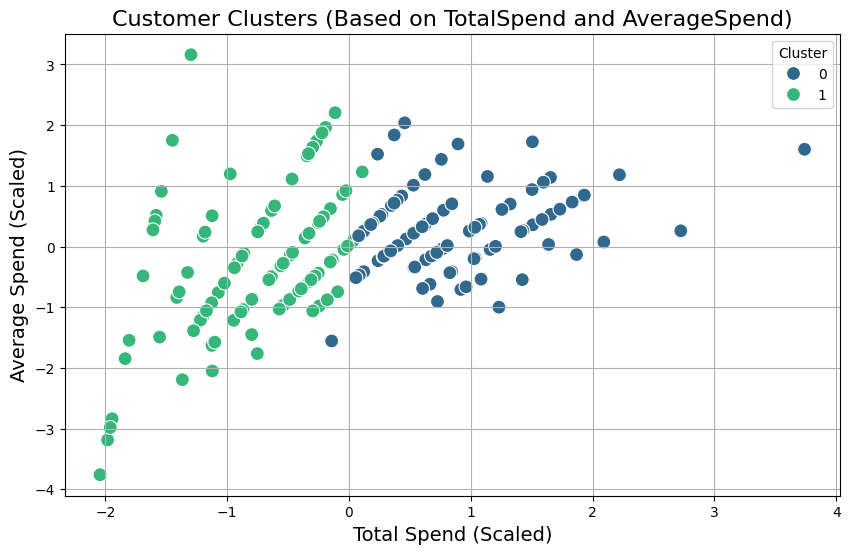


Clustering Results:


TypeError: agg function failed [how->mean,dtype->object]

In [5]:
!pip install gdown scikit-learn matplotlib seaborn pandas

import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

urls = {
    "Customers.csv": "https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE",
    "Products.csv": "https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0",
    "Transactions.csv": "https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"
}

for filename, url in urls.items():
    gdown.download(url, filename, quiet=False)

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())

transactions_products = pd.merge(transactions, products, on="ProductID", how="left")
customer_features = transactions_products.groupby("CustomerID").agg({
    "Price_y": ["sum", "mean", "count"],
    "Category": lambda x: x.mode()[0] if not x.mode().empty else "Unknown"
}).reset_index()

customer_features.columns = ["CustomerID", "TotalSpend", "AverageSpend", "TransactionCount", "TopCategory"]

customer_profiles = pd.merge(customers, customer_features, on="CustomerID", how="left")
customer_profiles.fillna(0, inplace=True)

customer_profiles = pd.get_dummies(customer_profiles, columns=["Region", "TopCategory"], drop_first=True)

numerical_columns = ["TotalSpend", "AverageSpend", "TransactionCount"]
scaler = StandardScaler()
customer_profiles[numerical_columns] = scaler.fit_transform(customer_profiles[numerical_columns])

X = customer_profiles.drop(columns=["CustomerID", "CustomerName", "SignupDate"])
db_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    db_scores.append(db_index)

optimal_k = k_values[np.argmin(db_scores)]
print(f"\nOptimal number of clusters based on DB Index: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs. Number of Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("DB Index", fontsize=14)
plt.xticks(k_values)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="TotalSpend",
    y="AverageSpend",
    hue="Cluster",
    palette="viridis",
    data=customer_profiles,
    s=100
)
plt.title("Customer Clusters (Based on TotalSpend and AverageSpend)", fontsize=16)
plt.xlabel("Total Spend (Scaled)", fontsize=14)
plt.ylabel("Average Spend (Scaled)", fontsize=14)
plt.legend(title="Cluster")
plt.grid()
plt.show()

print("\nClustering Results:")
print(customer_profiles.groupby("Cluster").mean())

customer_profiles.to_csv("Clustered_Customers.csv", index=False)
print("\nClustered customer data saved as 'Clustered_Customers.csv'.")


In [6]:
numeric_columns = ["TotalSpend", "AverageSpend", "TransactionCount"] + [col for col in customer_profiles.columns if "Region_" in col or "TopCategory_" in col]

clustering_summary = customer_profiles.groupby("Cluster")[numeric_columns].mean()

print("\nClustering Results:")
print(clustering_summary)



Clustering Results:
         TotalSpend  AverageSpend  TransactionCount  Region_Europe  \
Cluster                                                              
0          0.888886      0.301405          0.822357       0.233333   
1         -0.727271     -0.246604         -0.672838       0.263636   

         Region_North America  Region_South America  TopCategory_Books  \
Cluster                                                                  
0                    0.211111              0.355556           0.411111   
1                    0.245455              0.245455           0.272727   

         TopCategory_Clothing  TopCategory_Electronics  TopCategory_Home Decor  
Cluster                                                                         
0                    0.211111                 0.200000                0.177778  
1                    0.236364                 0.245455                0.236364  


Downloading...
From: https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 14.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 6.47MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 56.8MB/s]


Davies-Bouldin Index: 1.540


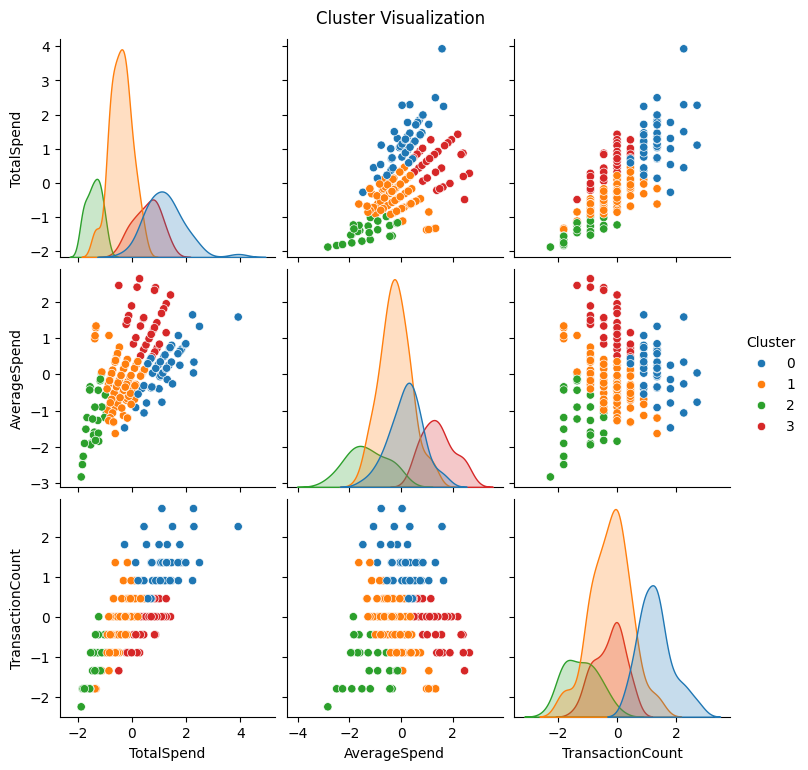


Clustering Results:
         TotalSpend  AverageSpend  TransactionCount  Region_Europe  \
Cluster                                                              
0          1.217754      0.191276          1.297469       0.145833   
1         -0.417387     -0.224920         -0.225647       0.206522   
2         -1.408851     -1.314395         -1.220164       0.333333   
3          0.545043      1.424245         -0.259836       0.454545   

         Region_North America  Region_South America  TopCategory_Books  \
Cluster                                                                  
0                    0.208333              0.354167           0.479167   
1                    0.271739              0.271739           0.282609   
2                    0.185185              0.333333           0.259259   
3                    0.181818              0.242424           0.333333   

         TopCategory_Clothing  TopCategory_Electronics  TopCategory_Home Decor  
Cluster                         

In [7]:
!pip install gdown pandas scikit-learn

import pandas as pd
import gdown
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

urls = {
    "Customers.csv": "https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE",
    "Products.csv": "https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0",
    "Transactions.csv": "https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"
}

for filename, url in urls.items():
    gdown.download(url, filename, quiet=False)

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

transactions_products = pd.merge(transactions, products, on="ProductID", how="left")
customer_features = transactions_products.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean", "count"],
    "Category": lambda x: x.mode()[0] if not x.mode().empty else "Unknown"
}).reset_index()

customer_features.columns = ["CustomerID", "TotalSpend", "AverageSpend", "TransactionCount", "TopCategory"]

customer_profiles = pd.merge(customers, customer_features, on="CustomerID", how="left")
customer_profiles.fillna(0, inplace=True)

customer_profiles = pd.get_dummies(customer_profiles, columns=["Region", "TopCategory"], drop_first=True)

numerical_columns = ["TotalSpend", "AverageSpend", "TransactionCount"]
scaler = StandardScaler()
customer_profiles[numerical_columns] = scaler.fit_transform(customer_profiles[numerical_columns])

X = customer_profiles[numerical_columns + [col for col in customer_profiles.columns if "Region_" in col or "TopCategory_" in col]]
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(X)

db_index = davies_bouldin_score(X, customer_profiles["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.3f}")

sns.pairplot(customer_profiles, vars=["TotalSpend", "AverageSpend", "TransactionCount"], hue="Cluster", palette="tab10")
plt.suptitle("Cluster Visualization", y=1.02)
plt.show()

numeric_columns = ["TotalSpend", "AverageSpend", "TransactionCount"] + [col for col in customer_profiles.columns if "Region_" in col or "TopCategory_" in col]
clustering_summary = customer_profiles.groupby("Cluster")[numeric_columns].mean()

print("\nClustering Results:")
print(clustering_summary)

customer_profiles.to_csv("Customer_Clusters.csv", index=False)
print("\nClustered customer profiles saved as 'Customer_Clusters.csv'.")
